In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

def visualize_nn(layer_sizes, weight_matrices, cmap=cm.bone):
    G = nx.DiGraph()
    pos = {}
    layer_spacing = 2.5
    node_spacing = 1.8

    # Add nodes with position
    for l_idx, n_nodes in enumerate(layer_sizes):
        y_offset = (n_nodes - 1) * node_spacing / 2
        for n_idx in range(n_nodes):
            node = f"L{l_idx}N{n_idx}"
            pos[node] = (l_idx * layer_spacing, y_offset - n_idx * node_spacing)
            G.add_node(node, layer=l_idx)

    # Add edges and store weights
    edge_weights = []
    for l in range(len(layer_sizes) - 1):
        W = weight_matrices[l]
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                src = f"L{l}N{i}"
                tgt = f"L{l+1}N{j}"
                weight = W[i, j]
                G.add_edge(src, tgt, weight=weight)
                edge_weights.append(weight)

    # Normalize weights for color
    vmin = min(edge_weights)
    vmax = max(edge_weights)
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Use a subset of the color map away from 0
    color_min = 0.3
    color_max = 0.9
    color_range = color_max - color_min
    
    edge_colors = [cmap(color_min + color_range * norm(G[u][v]['weight'])) for u, v in G.edges()]
    edge_widths = 1

    # Draw nodes
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.axis('off')  
    nx.draw_networkx_nodes(G, pos,
                           node_color='lightgrey',
                           edgecolors='black',
                           node_size=1200,
                           linewidths=1)
    
    # Draw edges with heatmap
    nx.draw_networkx_edges(G, pos,
                           edge_color=edge_colors,
                           width=edge_widths,
                           alpha=0.85)

    custom_cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
        "custom_cmap",
        [cmap(color_min), cmap(color_max)],
        N=256
    )
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_label("Weight Value", rotation=270, labelpad=15)

    plt.tight_layout()
    plt.box(False) 
    plt.tight_layout()
    plt.savefig('graph.svg')
    plt.show()


In [5]:
layer_sizes = [10, 16, 8, 4, 1]  
weights = [
    np.random.uniform(-1, 1, (layer_sizes[0], layer_sizes[1])),
    np.random.uniform(-1, 1, (layer_sizes[1], layer_sizes[2])), 
    np.random.uniform(-1, 1, (layer_sizes[2], layer_sizes[3])),  
]

visualize_nn(layer_sizes, weights)

IndexError: list index out of range

/tmp/ipykernel_2566122/2793631365.py:56: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


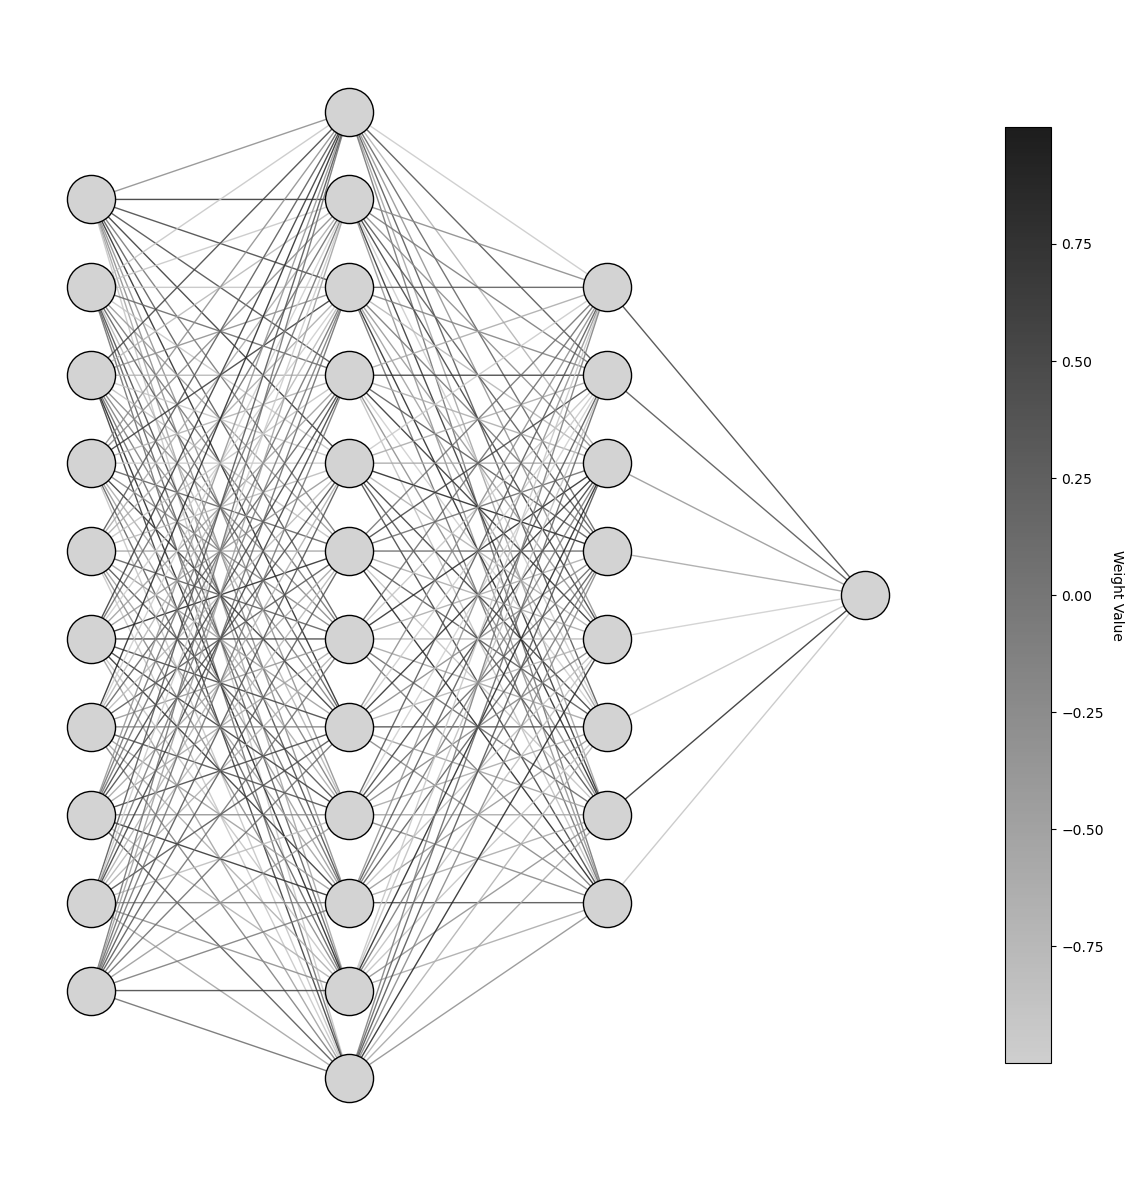

In [3]:
layer_sizes = [10, 12, 8, 1]  
weights = [
    np.random.uniform(-1, 1, (layer_sizes[0], layer_sizes[1])),
    np.random.uniform(-1, 1, (layer_sizes[1], layer_sizes[2])), 
    np.random.uniform(-1, 1, (layer_sizes[2], layer_sizes[3])),  
]

visualize_nn(layer_sizes, weights, cm.Greys)